##**Import Library**

In [1]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=7ea8432532d69dca8e65e6aed911be36edceca54f571ae9d5df9ded480b63510
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import googletrans
from googletrans import Translator
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#**Tahun 2020**

##**Load Dataset**

In [216]:
df_2020 = pd.read_csv('/content/2020.csv')
df_2020.head()

,Unnamed: 0,ID,Date,Tweet
0,0,1225843867435651074,2020-02-07 18:08:47+00:00,"2020, Kemendes akan Fokus Laksanakan Program K..."
1,1,1225819891191537665,2020-02-07 16:33:31+00:00,Kemendes akan berkoordinasi dengan Kemendikbud...
2,2,1225813241688805376,2020-02-07 16:07:05+00:00,4 program Kampus Merdeka bisa kalian liat di Y...
3,3,1225812508801290240,2020-02-07 16:04:11+00:00,"Mendikbud kita, Mas Nadiem, sudah membuat 2 ge..."
4,4,1225797638521405441,2020-02-07 15:05:05+00:00,Pembangunan Desa yang Butuh Dampingan Mahasisw...


In [217]:
# Cek dimensi data
df_2020.shape

(6124, 4)

In [218]:
# Cek missing value
df_2020.isna().sum()

Unnamed: 0    0
ID            0
Date          0
Tweet         0
dtype: int64

In [219]:
# Buat salinan dataset
df_2020_copy = df_2020.copy()

##**Preprocessing Data**

###**Data Cleaning**

In [220]:
def clean(text):
  # Menghapus newline
  text = text.replace('\n', ' ')

  # Menghapus non-ascii
  text = text.encode('ascii', 'ignore').decode('utf-8', 'ignore')

  # Menghapus mention
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  
  # Menghapus RT
  text = re.sub(r'RT[\s]', '', text)

  # Menghapus link
  text = re.sub(r'http\S+', '', text)

  # Menghapus white space
  text = re.sub('[\s]+', ' ', text)

  # Menghapus spasi depan
  text = text.lstrip()

  # Menghapus tanda baca
  text = re.sub('\w+:\/\/\S+', '', text)
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  
  return text

In [226]:
df_2020['Tweet'] = df_2020['Tweet'].apply(clean)
df_2020['Tweet'].head(10)

0    Kemendes akan Fokus Laksanakan Program KampusM...
1    Kemendes akan berkoordinasi dengan Kemendikbud...
2    program Kampus Merdeka bisa kalian liat di You...
3    Mendikbud kita Mas Nadiem sudah membuat gebrak...
4    Pembangunan Desa yang Butuh Dampingan Mahasisw...
5    Inilah Arti Kampus Merdeka dalam Kebijakan Mer...
6    Kebijakan Kampus Merdeka tidak akan bersifat p...
7    Belajar di luar kampus ala KampusMerdeka progr...
8    Konsep kampus merdeka Pengen buat fakultas Sen...
9    RI Kalau mahasiswa boleh ambil mata kuliah di ...
Name: Tweet, dtype: object

###**Case Folding**

Case folding digunakan untuk mengubah seluruh isi data text menjadi huruf kecil agar menjadi seragam

In [227]:
def case_folding(text):
  text = text.lower()
  return text

In [228]:
df_2020['Tweet'] = df_2020['Tweet'].apply(case_folding)
df_2020['Tweet'].head()

0    kemendes akan fokus laksanakan program kampusm...
1    kemendes akan berkoordinasi dengan kemendikbud...
2    program kampus merdeka bisa kalian liat di you...
3    mendikbud kita mas nadiem sudah membuat gebrak...
4    pembangunan desa yang butuh dampingan mahasisw...
Name: Tweet, dtype: object

###**Slang Word Normalization**

In [229]:
# Kamus
slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")
slang_word.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [230]:
slang_dict = pd.Series(slang_word['formal'].values,index=slang_word['slang']).to_dict()

def Slangwords(text):
    for word in text.split():
        if word in slang_dict.keys():
            text = text.replace(word, slang_dict[word])
    return text

In [231]:
df_2020['Tweet'] = df_2020['Tweet'].apply(Slangwords)
df_2020['Tweet'].head()

0    kemendes akan fokus laksanakan program kampusm...
1    kemendes akan berkoordinasi dengan kemendikbud...
2    program kampus merdeka bisa kalian lihat di yo...
3    mendikbud kita mas nadiem sudah membuat gebrak...
4    pembangunan desa yang butuh dampingan mahasisw...
Name: Tweet, dtype: object

###**Filtering/Stopword Removal**

In [232]:
nltk.download('stopwords')
list_stopword = stopwords.words('indonesian')

list_stopword = set(list_stopword)

def stopword(text):
  word_tokens = word_tokenize(text)
  filtered = [word for word in word_tokens if word not in list_stopword]
  return ' '.join(filtered)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [235]:
df_2020['Tweet'] = df_2020['Tweet'].apply(stopword)
df_2020['Tweet'].head()

0      kemendes fokus laksanakan program kampusmerdeka
1    kemendes berkoordinasi kemendikbud terkait pro...
2    program kampus merdeka lihat youtube kemendikb...
3    mendikbud mas nadiem gebrakan hebat merdeka be...
4    pembangunan desa butuh dampingan mahasiswa cip...
Name: Tweet, dtype: object

###**Labeling**

In [236]:
# Menghapus kolom yang tidak diperlukan
df_2020_clean = df_2020.drop(columns=['Unnamed: 0', 'ID', 'Date'])
df_2020_clean.head()

,Tweet
0,kemendes fokus laksanakan program kampusmerdeka
1,kemendes berkoordinasi kemendikbud terkait pro...
2,program kampus merdeka lihat youtube kemendikb...
3,mendikbud mas nadiem gebrakan hebat merdeka be...
4,pembangunan desa butuh dampingan mahasiswa cip...


In [237]:
translator_2020 = Translator()
translation_2020 = {}
for column in df_2020_clean.columns:
  unique_elements = df_2020_clean[column].unique()
  for element in unique_elements:
    translation_2020[element] = translator_2020.translate(element).text

In [238]:
df_2020_clean.replace(translation_2020, inplace=True)
df_2020_clean.head()

,Tweet
0,Ministry of Health focuses on carrying out the...
1,the ministry of village coordinates the minist...
2,"independent campus program, see the Ministry o..."
3,"Minister of Education and Culture, Mas Nadiem,..."
4,village development needs student assistance t...


In [242]:
df_2020_clean['Tweet'] = df_2020_clean['Tweet'].apply(clean)
df_2020_clean['Tweet'] = df_2020_clean['Tweet'].apply(case_folding)
df_2020_clean['Tweet'].head()

0    ministry of health focuses on carrying out the...
1    the ministry of village coordinates the minist...
2    independent campus program see the ministry of...
3    minister of education and culture mas nadiem a...
4    village development needs student assistance t...
Name: Tweet, dtype: object

In [243]:
status_20 = []
polarity_score_20 = []
total_positif_20 = total_negatif_20 = total_netral_20 = total_20 = 0

for tweet in df_2020_clean['Tweet']:
  analysis = TextBlob(tweet)
  all_polarity_20 = analysis.polarity
  polarity_score_20.append(all_polarity_20)
  if (analysis.sentiment.polarity > 0.0):
    total_positif_20 += 1
    status_20.append('Positif')
  elif (analysis.sentiment.polarity < 0.0):
    total_negatif_20 += 1
    status_20.append('Negatif')
  else:
    total_netral_20 += 1
    status_20.append('Netral')
  total_20 += 1

print('Label positif =', total_positif_20)
print('Label negatif =', total_negatif_20)
print('Label netral =', total_netral_20)

Label positif = 2202
Label negatif = 738
Label netral = 3184


In [244]:
status_20 = pd.DataFrame({'label': status_20})
df_2020_clean['label'] = status_20
df_2020_clean['polarity_score'] = polarity_score_20
df_2020_clean.head()

,Tweet,label,polarity_score
0,ministry of health focuses on carrying out the...,Netral,0.000000
1,the ministry of village coordinates the minist...,Netral,0.000000
2,independent campus program see the ministry of...,Positif,0.316667
3,minister of education and culture mas nadiem a...,Positif,0.266667
4,village development needs student assistance t...,Netral,0.000000


<Axes: >

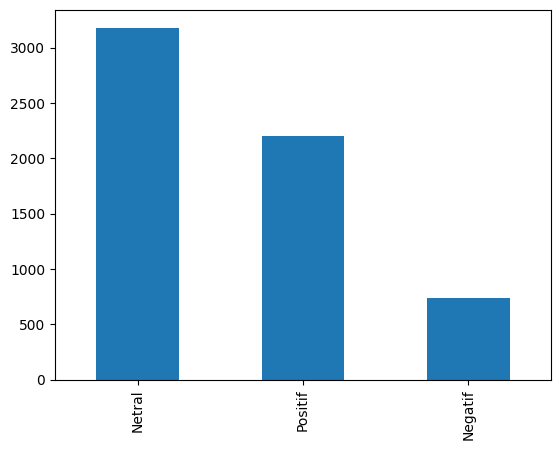

In [245]:
df_2020_clean['label'].value_counts().plot(kind='bar')

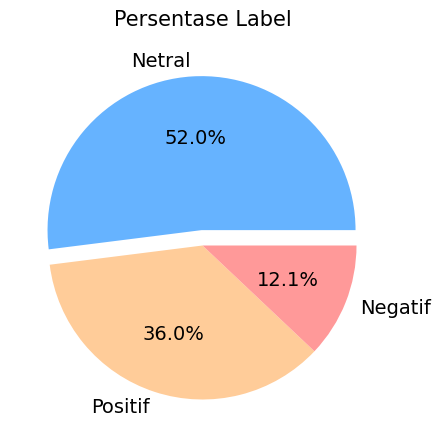

In [246]:
# Visualisasi persentase label
fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df_2020_clean['label'].value_counts()]
labels = ["Netral", "Positif", "Negatif"]
explode = (0.1, 0, 0)
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x=sizes, 
       labels=labels, 
       colors=colors, 
       autopct='%1.1f%%', 
       explode=explode, 
       textprops={'fontsize': 14})
ax.set_title('Persentase Label', fontsize = 15, pad = 20)
plt.show()

###**Word Cloud**

In [247]:
# Buat salinan dataset
df_2020_split = df_2020_clean.copy()

In [248]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [249]:
df_2020_split['Tweet_split'] = df_2020_split['Tweet'].apply(split_word)
df_2020_split['Tweet_split'].head()

0    [ministry, of, health, focuses, on, carrying, ...
1    [the, ministry, of, village, coordinates, the,...
2    [independent, campus, program, see, the, minis...
3    [minister, of, education, and, culture, mas, n...
4    [village, development, needs, student, assista...
Name: Tweet_split, dtype: object

In [250]:
positive_review = df_2020_split[df_2020_split['label'] == 'Positif']
positive_review = positive_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_review.index += 1
positive_review.head()

,Tweet_split,polarity_score,label
1,"[yudharta, university, pasuruan, samaeng, say,...",1.0,Positif
2,"[in, line, with, nadiem, the, merdeka, campus,...",1.0,Positif
3,"[campus, of, choice, of, campus, merdeka, may,...",1.0,Positif
4,"[hut, sgu, apply, the, best, graduates, campus...",1.0,Positif
5,"[the, best, college, in, the, lldikti, area, i...",1.0,Positif


In [251]:
negative_review = df_2020_split[df_2020_split['label'] == 'Negatif']
negative_review = negative_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
negative_review.index += 1
negative_review.head()

,Tweet_split,polarity_score,label
1,"[insist, on, building, a, super, strange, city...",-0.002083,Negatif
2,"[lying, down, for, fun, lying, down, is, a, mu...",-0.002778,Negatif
3,"[heinous, truly, humane, as, much, as, he, hat...",-0.003571,Negatif
4,"[merdeka, campus, brawijaya, language, center,...",-0.008333,Negatif
5,"[hi, maba, looking, for, confusion, what, do, ...",-0.008929,Negatif


In [252]:
neutral_review = df_2020_split[df_2020_split['label'] == 'Netral']
neutral_review = neutral_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
neutral_review.index += 1
neutral_review.head()

,Tweet_split,polarity_score,label
1,"[ministry, of, health, focuses, on, carrying, ...",0.0,Netral
2,"[independent, campus, independent, campus, ind...",0.0,Netral
3,"[the, realization, of, an, independent, campus...",0.0,Netral
4,"[officials, in, lockdown, make, it, embarrassi...",0.0,Netral
5,"[independent, campus, logo, launched]",0.0,Netral


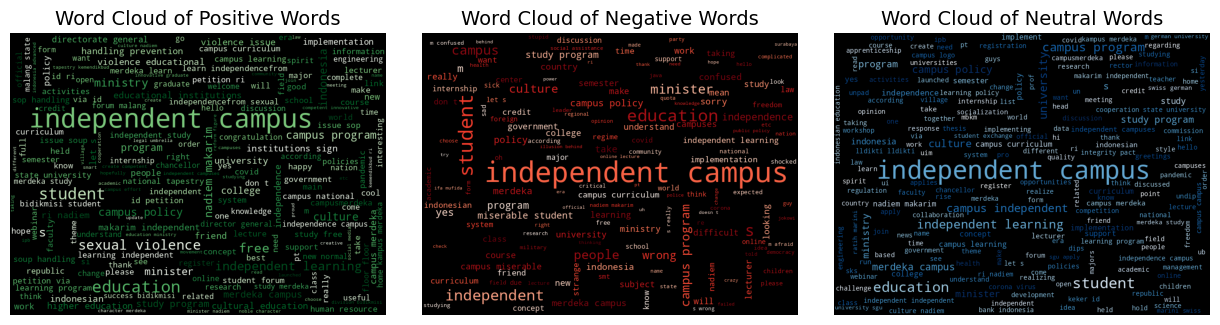

In [253]:
# Positif
positive_words = positive_review['Tweet_split']

fig, ax = plt.subplots(1, 3,figsize = (12, 10))

list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

# Negatif
negative_words = negative_review['Tweet_split']

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

# Netral
neutral_words = neutral_review['Tweet_split']

list_words_neutral=''
for row_word in neutral_words:
    for word in row_word:
        list_words_neutral += ' '+(word)
wordcloud_neutral = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Blues'
                               , min_font_size = 10).generate(list_words_neutral)
ax[2].set_title('Word Cloud of Neutral Words', fontsize = 14)
ax[2].grid(False)
ax[2].imshow((wordcloud_neutral))
fig.tight_layout(pad=0)
ax[2].axis('off')

plt.show()

###**One-Hot-Encoding**

In [254]:
# Melakukan one-hot-encoding terhadap label
category_2020 = pd.get_dummies(df_2020_clean.label)
df_2020_clean = pd.concat([df_2020_clean, category_2020], axis=1)
df_2020_clean = df_2020_clean.drop(columns=['label'])
df_2020_clean.head()

,Tweet,polarity_score,Negatif,Netral,Positif
0,ministry of health focuses on carrying out the...,0.000000,0,1,0
1,the ministry of village coordinates the minist...,0.000000,0,1,0
2,independent campus program see the ministry of...,0.316667,0,0,1
3,minister of education and culture mas nadiem a...,0.266667,0,0,1
4,village development needs student assistance t...,0.000000,0,1,0


###**Split Data**

In [255]:
X_2020 = df_2020_clean['Tweet'].values
y_2020 = df_2020_clean[['Negatif', 'Netral',	'Positif']].values
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020, y_2020, test_size=0.3)

###**Tokenization**

In [256]:
tokenizer_2020 = Tokenizer(num_words=10000, oov_token='x')
tokenizer_2020.fit_on_texts(X_train_2020) 
tokenizer_2020.fit_on_texts(X_test_2020)
 
seq_train_2020 = tokenizer_2020.texts_to_sequences(X_train_2020)
seq_test_2020 = tokenizer_2020.texts_to_sequences(X_test_2020)
 
pad_train_2020 = pad_sequences(seq_train_2020) 
pad_test_2020 = pad_sequences(seq_test_2020)

###**Fungsi Callback**

In [257]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and 
       logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai > 85%!")
      self.model.stop_training = True
callbacks = myCallback()

##**Modeling LSTM**

In [267]:
model_2020 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.LSTM(64),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

print(model_2020.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 64)          640000    
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 3)                 195       
                                                                 
Total params: 681,539
Trainable params: 681,539
Non-trainable params: 0
_________________________________________________________________
None


In [268]:
model_2020.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [269]:
history_2020 = model_2020.fit(pad_train_2020, 
                              y_train_2020, 
                              epochs=100, 
                              validation_data=(pad_test_2020, y_test_2020), 
                              verbose=2,
                              callbacks=[callbacks])

Epoch 1/100
134/134 - 10s - loss: 0.8480 - accuracy: 0.6111 - val_loss: 0.7070 - val_accuracy: 0.7013 - 10s/epoch - 71ms/step
Epoch 2/100
134/134 - 7s - loss: 0.4201 - accuracy: 0.8413 - val_loss: 0.5113 - val_accuracy: 0.8134 - 7s/epoch - 51ms/step
Epoch 3/100
134/134 - 6s - loss: 0.1420 - accuracy: 0.9529 - val_loss: 0.5216 - val_accuracy: 0.8471 - 6s/epoch - 43ms/step
Epoch 4/100
134/134 - 7s - loss: 0.0534 - accuracy: 0.9855 - val_loss: 0.5688 - val_accuracy: 0.8487 - 7s/epoch - 52ms/step
Epoch 5/100

Akurasi telah mencapai > 85%!
134/134 - 6s - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.8069 - val_accuracy: 0.8580 - 6s/epoch - 43ms/step


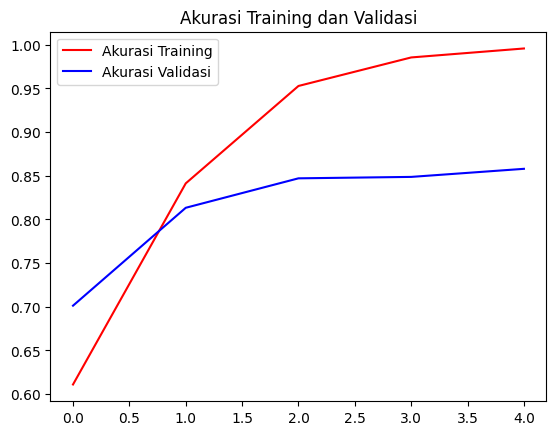

<Figure size 640x480 with 0 Axes>

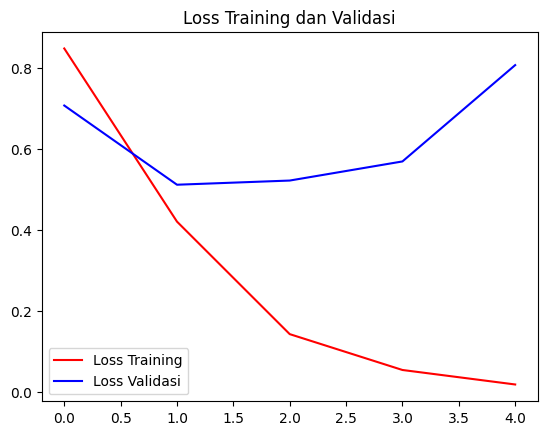

<Figure size 640x480 with 0 Axes>

In [270]:
acc = history_2020.history['accuracy'] 
val_acc = history_2020.history['val_accuracy']      
loss = history_2020.history['loss']             
val_loss = history_2020.history['val_loss']    

epochs = range(len(acc))                                 

plt.plot(epochs, acc, 'r', label = 'Akurasi Training')             
plt.plot(epochs, val_acc, 'b', label = 'Akurasi Validasi')    
plt.title('Akurasi Training dan Validasi')                    
plt.legend(loc = 0)                                         
plt.figure()                                             
plt.show()                                                  

plt.plot(epochs, loss, 'r', label = 'Loss Training')           
plt.plot(epochs, val_loss, 'b', label = 'Loss Validasi')        
plt.title('Loss Training dan Validasi')                      
plt.legend(loc = 0)           
plt.figure()                 
plt.show()          

###**Confusion Matrix**

58/58 [==============================] - 1s 23ms/step


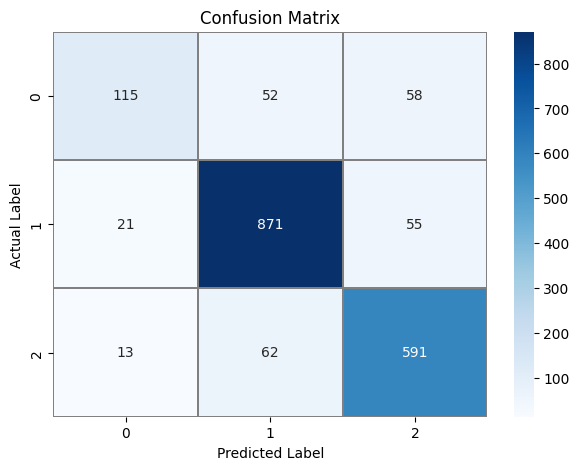

In [273]:
y_pred_20 = model_2020.predict(pad_test_2020)
y_pred_20 = np.argmax(y_pred_20, axis=1)
y_class_20 = np.argmax(y_test_2020, axis=1)
confusion_mtx = confusion_matrix(y_class_20, y_pred_20) 

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap="Blues", linecolor = "gray", fmt = '.0f', ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [272]:
report_20 = classification_report(y_class_20, y_pred_20)
print(report_20)

              precision    recall  f1-score   support

           0       0.77      0.51      0.61       225
           1       0.88      0.92      0.90       947
           2       0.84      0.89      0.86       666

    accuracy                           0.86      1838
   macro avg       0.83      0.77      0.79      1838
weighted avg       0.85      0.86      0.85      1838



#**Tahun 2021**

##**Load Dataset**

In [112]:
df_2021 = pd.read_csv('/content/2021.csv')
df_2021.head()

,Unnamed: 0,ID,Date,Tweet
0,0,1355619926699094023,2021-01-30 20:52:31+00:00,Ttd MoU antara SEAMEO Centre Indonesia Kemdikb...
1,1,1355579246022803464,2021-01-30 18:10:52+00:00,"Halo #InsanDikti, \n\nDalam rangka pelaksanaan..."
2,2,1355550060251992068,2021-01-30 16:14:53+00:00,Jangan Ada Kesan Polri Pelihara “Sampah Masyar...
3,3,1355549548572098560,2021-01-30 16:12:51+00:00,"Terlihat Panik di tvOne, Isyaratkan Abu Janda ..."
4,4,1355548661686497282,2021-01-30 16:09:20+00:00,"Soal Cuitan ""Islam Arogan"", Pemuda Muhammadiya..."


In [113]:
# Cek dimensi data
df_2021.shape

(6842, 4)

In [114]:
# Cek missing value
df_2021.isna().sum()

Unnamed: 0    0
ID            0
Date          0
Tweet         0
dtype: int64

In [115]:
# Buat salinan dataset
df_2021_copy = df_2021.copy()

##**Preprocessing Data**

###**Data Cleaning**

In [120]:
df_2021['Tweet'] = df_2021['Tweet'].apply(clean)
df_2021['Tweet'].head()

0    Ttd MoU antara SEAMEO Centre Indonesia Kemdikb...
1    Halo InsanDikti Dalam rangka pelaksanaan Progr...
2    Jangan Ada Kesan Polri Pelihara Sampah Masyara...
3    Terlihat Panik di tvOne Isyaratkan Abu Janda K...
4    Soal Cuitan Islam Arogan Pemuda Muhammadiyah M...
Name: Tweet, dtype: object

###**Case Folding**

In [121]:
df_2021['Tweet'] = df_2021['Tweet'].apply(case_folding)
df_2021['Tweet'].head()

0    ttd mou antara seameo centre indonesia kemdikb...
1    halo insandikti dalam rangka pelaksanaan progr...
2    jangan ada kesan polri pelihara sampah masyara...
3    terlihat panik di tvone isyaratkan abu janda k...
4    soal cuitan islam arogan pemuda muhammadiyah m...
Name: Tweet, dtype: object

###**Slangword Normalization**

In [122]:
df_2021['Tweet'] = df_2021['Tweet'].apply(Slangwords)
df_2021['Tweet'].head()

0    ttd mou antara seameo centre indonesia kemdikb...
1    halo insandikti dalam rangka pelaksanaan progr...
2    jangan ada kesan polri pelihara sampah masyara...
3    terlihat panik di tvone isyaratkan abu janda k...
4    soal cuitan islam arogan pemuda muhammadiyah m...
Name: Tweet, dtype: object

###**Filtering/Stopword Removal**

In [123]:
df_2021['Tweet'] = df_2021['Tweet'].apply(stopword)
df_2021['Tweet'].head()

0    ttd mou seameo centre indonesia kemdikbud kope...
1    halo insandikti rangka pelaksanaan program kom...
2    kesan polri pelihara sampah masyarakat tangkap...
3    panik tvone isyaratkan abu janda ketakutan sam...
4    cuitan islam arogan pemuda muhammadiyah polisi...
Name: Tweet, dtype: object

###**Labeling**

In [124]:
# Menghapus kolom yang tidak diperlukan
df_2021_clean = df_2021.drop(columns=['Unnamed: 0', 'ID', 'Date'])
df_2021_clean.head()

,Tweet
0,ttd mou seameo centre indonesia kemdikbud kope...
1,halo insandikti rangka pelaksanaan program kom...
2,kesan polri pelihara sampah masyarakat tangkap...
3,panik tvone isyaratkan abu janda ketakutan sam...
4,cuitan islam arogan pemuda muhammadiyah polisi...


In [125]:
translator_2021 = Translator()
translation_2021 = {}
for column in df_2021_clean.columns:
  unique_elements = df_2021_clean[column].unique()
  for element in unique_elements:
    translation_2021[element] = translator_2021.translate(element).text

In [126]:
df_2021_clean.replace(translation_2021, inplace=True)
df_2021_clean.head()

,Tweet
0,signed mou seameo center indonesia ministry of...
1,hello insandikti for the implementation of the...
2,Impression of the National Police looking afte...
3,"tvone panic signaled the ashes of the widow, f..."
4,Islamic tweets arrogant Muhammadiyah youth pol...


In [130]:
df_2021_clean['Tweet'] = df_2021_clean['Tweet'].apply(clean)
df_2021_clean['Tweet'] = df_2021_clean['Tweet'].apply(case_folding)
df_2021_clean['Tweet'].head()

0    signed mou seameo center indonesia ministry of...
1    hello insandikti for the implementation of the...
2    impression of the national police looking afte...
3    tvone panic signaled the ashes of the widow fe...
4    islamic tweets arrogant muhammadiyah youth pol...
Name: Tweet, dtype: object

In [138]:
status_21 = []
polarity_score_21 = []
total_positif_21 = total_negatif_21 = total_netral_21 = total_21 = 0

for tweet in df_2021_clean['Tweet']:
  analysis = TextBlob(tweet)
  all_polarity_21 = analysis.polarity
  polarity_score_21.append(all_polarity_21)
  if (analysis.sentiment.polarity > 0.0):
    total_positif_21 += 1
    status_21.append('Positif')
  elif (analysis.sentiment.polarity < 0.0):
    total_negatif_21 += 1
    status_21.append('Negatif')
  else:
    total_netral_21 += 1
    status_21.append('Netral')
  total_21 += 1

print('Label positif =', total_positif_21)
print('Label negatif =', total_negatif_21)
print('Label netral =', total_netral_21)

Label positif = 2427
Label negatif = 833
Label netral = 3582


In [139]:
status_21 = pd.DataFrame({'label': status_21})
df_2021_clean['label'] = status_21
df_2021_clean['polarity_score'] = polarity_score_21
df_2021_clean.head()

,Tweet,label,polarity_score
0,signed mou seameo center indonesia ministry of...,Negatif,-0.100000
1,hello insandikti for the implementation of the...,Netral,0.000000
2,impression of the national police looking afte...,Negatif,-0.100000
3,tvone panic signaled the ashes of the widow fe...,Positif,0.136364
4,islamic tweets arrogant muhammadiyah youth pol...,Positif,0.045833


<Axes: >

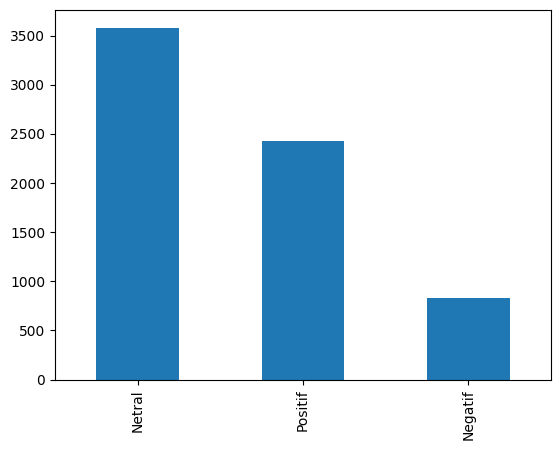

In [140]:
df_2021_clean['label'].value_counts().plot(kind='bar')

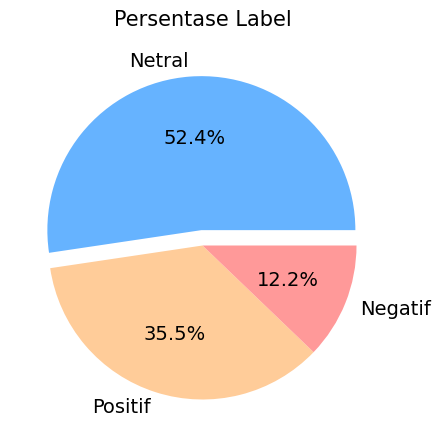

In [142]:
# Visualisasi persentase label
fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df_2021_clean['label'].value_counts()]
labels = ["Netral", "Positif", "Negatif"]
explode = (0.1, 0, 0)
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x=sizes, 
       labels=labels, 
       colors=colors, 
       autopct='%1.1f%%', 
       explode=explode, 
       textprops={'fontsize': 14})
ax.set_title('Persentase Label', fontsize = 15, pad = 20)
plt.show()

###**Word Cloud**

In [143]:
# Buat salinan dataset
df_2021_split = df_2021_clean.copy()

In [144]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [145]:
df_2021_split['Tweet_split'] = df_2021_split['Tweet'].apply(split_word)
df_2021_split['Tweet_split'].head()

0    [signed, mou, seameo, center, indonesia, minis...
1    [hello, insandikti, for, the, implementation, ...
2    [impression, of, the, national, police, lookin...
3    [tvone, panic, signaled, the, ashes, of, the, ...
4    [islamic, tweets, arrogant, muhammadiyah, yout...
Name: Tweet_split, dtype: object

In [146]:
positive_review = df_2021_split[df_2021_split['label'] == 'Positif']
positive_review = positive_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_review.index += 1
positive_review.head()

,Tweet_split,polarity_score,label
1,"[in, line, with, nadiem, the, merdeka, campus,...",1.0,Positif
2,"[hut, sgu, apply, the, best, graduates, campus...",1.0,Positif
3,"[the, best, college, in, the, lldikti, area, i...",1.0,Positif
4,"[campus, of, choice, of, campus, merdeka, may,...",1.0,Positif
5,"[indonesia, s, best, campus, is, located, in, ...",1.0,Positif


In [153]:
negative_review = df_2021_split[df_2021_split['label'] == 'Negatif']
negative_review = negative_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
negative_review.index += 1
negative_review.head()

,Tweet_split,polarity_score,label
1,"[insist, on, building, a, super, strange, city...",-0.002083,Negatif
2,"[lying, down, for, fun, lying, down, is, a, mu...",-0.002778,Negatif
3,"[heinous, truly, humane, as, much, as, he, hat...",-0.003571,Negatif
4,"[merdeka, campus, brawijaya, language, center,...",-0.008333,Negatif
5,"[hi, maba, looking, for, confusion, what, do, ...",-0.008929,Negatif


In [154]:
neutral_review = df_2021_split[df_2021_split['label'] == 'Netral']
neutral_review = neutral_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
neutral_review.index += 1
neutral_review.head()

,Tweet_split,polarity_score,label
1,"[hello, insandikti, for, the, implementation, ...",0.0,Netral
2,"[support, the, merdeka, campus, merdeka, learn...",0.0,Netral
3,"[researcher, of, pusriskel, webinar, workshop,...",0.0,Netral
4,"[head, of, lldikti, wil, iv, kasamapus, samaer...",0.0,Netral
5,"[what, is, it, that, semi, online, meets, the,...",0.0,Netral


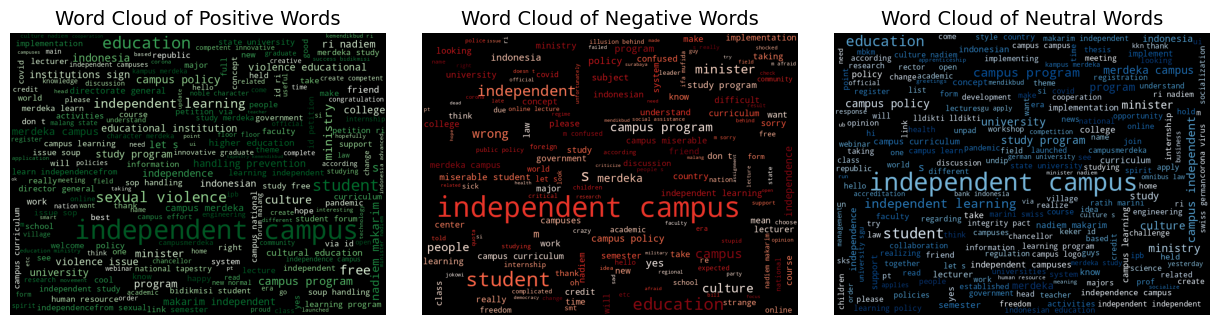

In [155]:
# Positif
positive_words = positive_review['Tweet_split']

fig, ax = plt.subplots(1, 3,figsize = (12, 10))

list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

# Negatif
negative_words = negative_review['Tweet_split']

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

# Netral
neutral_words = neutral_review['Tweet_split']

list_words_neutral=''
for row_word in neutral_words:
    for word in row_word:
        list_words_neutral += ' '+(word)
wordcloud_neutral = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Blues'
                               , min_font_size = 10).generate(list_words_neutral)
ax[2].set_title('Word Cloud of Neutral Words', fontsize = 14)
ax[2].grid(False)
ax[2].imshow((wordcloud_neutral))
fig.tight_layout(pad=0)
ax[2].axis('off')

plt.show()

###**One-Hot_Encoding**

In [156]:
# Melakukan encoding terhadap label
# Melakukan one-hot-encoding terhadap label
category_2021 = pd.get_dummies(df_2021_clean.label)
df_2021_clean = pd.concat([df_2021_clean, category_2021], axis=1)
df_2021_clean = df_2021_clean.drop(columns=['label'])
df_2021_clean.head()

,Tweet,polarity_score,Negatif,Netral,Positif
0,signed mou seameo center indonesia ministry of...,-0.100000,1,0,0
1,hello insandikti for the implementation of the...,0.000000,0,1,0
2,impression of the national police looking afte...,-0.100000,1,0,0
3,tvone panic signaled the ashes of the widow fe...,0.136364,0,0,1
4,islamic tweets arrogant muhammadiyah youth pol...,0.045833,0,0,1


###**Split Data**

In [157]:
X_2021 = df_2021_clean['Tweet'].values
y_2021 = df_2021_clean[['Negatif', 'Netral',	'Positif']].values
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(X_2021, y_2021, test_size=0.3)

###**Tokenization**

In [158]:
tokenizer_2021 = Tokenizer(num_words=10000, oov_token='x')
tokenizer_2021.fit_on_texts(X_train_2021) 
tokenizer_2021.fit_on_texts(X_test_2021)
 
seq_train_2021 = tokenizer_2021.texts_to_sequences(X_train_2021)
seq_test_2021 = tokenizer_2021.texts_to_sequences(X_test_2021)
 
pad_train_2021 = pad_sequences(seq_train_2021) 
pad_test_2021 = pad_sequences(seq_test_2021)

###**Fungsi Callback**

In [159]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and 
       logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai > 85%!")
      self.model.stop_training = True
callbacks = myCallback()

##**Modeling LSTM**

In [160]:
model_2021 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.LSTM(64),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

print(model_2021.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 681,539
Trainable params: 681,539
Non-trainable params: 0
_________________________________________________________________
None


In [161]:
model_2021.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

In [162]:
history_2021 = model_2021.fit(pad_train_2021, 
                              y_train_2021, 
                              epochs=100, 
                              validation_data=(pad_test_2021, y_test_2021), 
                              verbose=2,
                              callbacks=[callbacks])

Epoch 1/100
150/150 - 10s - loss: 0.8568 - accuracy: 0.6093 - val_loss: 0.7721 - val_accuracy: 0.6717 - 10s/epoch - 69ms/step
Epoch 2/100
150/150 - 7s - loss: 0.5881 - accuracy: 0.7651 - val_loss: 0.7664 - val_accuracy: 0.7443 - 7s/epoch - 50ms/step
Epoch 3/100
150/150 - 6s - loss: 0.3436 - accuracy: 0.8718 - val_loss: 0.6035 - val_accuracy: 0.7998 - 6s/epoch - 43ms/step
Epoch 4/100
150/150 - 8s - loss: 0.2101 - accuracy: 0.9300 - val_loss: 0.5480 - val_accuracy: 0.8164 - 8s/epoch - 51ms/step
Epoch 5/100
150/150 - 6s - loss: 0.1272 - accuracy: 0.9630 - val_loss: 0.6427 - val_accuracy: 0.8061 - 6s/epoch - 43ms/step
Epoch 6/100
150/150 - 8s - loss: 0.0880 - accuracy: 0.9743 - val_loss: 0.5960 - val_accuracy: 0.8446 - 8s/epoch - 50ms/step
Epoch 7/100
150/150 - 6s - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.7249 - val_accuracy: 0.8456 - 6s/epoch - 43ms/step
Epoch 8/100
150/150 - 8s - loss: 0.0415 - accuracy: 0.9883 - val_loss: 0.6932 - val_accuracy: 0.8285 - 8s/epoch - 50ms/step
Epoch 

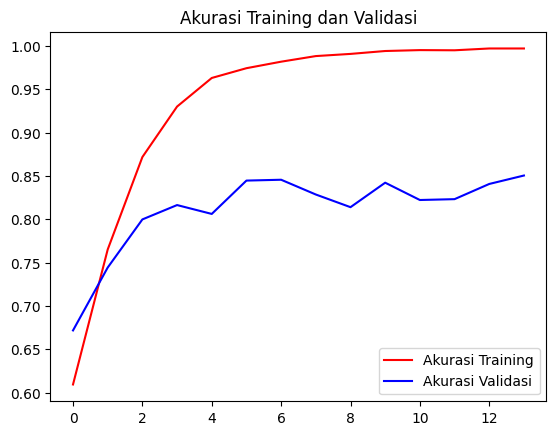

<Figure size 640x480 with 0 Axes>

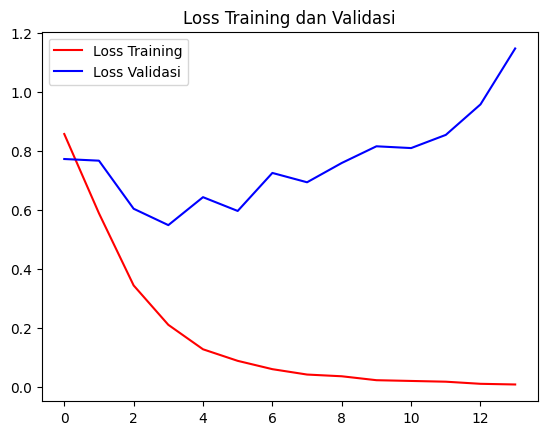

<Figure size 640x480 with 0 Axes>

In [163]:
acc = history_2021.history['accuracy'] 
val_acc = history_2021.history['val_accuracy']      
loss = history_2021.history['loss']             
val_loss = history_2021.history['val_loss']    

epochs = range(len(acc))                                 

plt.plot(epochs, acc, 'r', label = 'Akurasi Training')             
plt.plot(epochs, val_acc, 'b', label = 'Akurasi Validasi')    
plt.title('Akurasi Training dan Validasi')                    
plt.legend(loc = 0)                                         
plt.figure()                                             
plt.show()                                                  

plt.plot(epochs, loss, 'r', label = 'Loss Training')           
plt.plot(epochs, val_loss, 'b', label = 'Loss Validasi')        
plt.title('Loss Training dan Validasi')                      
plt.legend(loc = 0)           
plt.figure()                 
plt.show()          

###**Confusion Matrix**

65/65 [==============================] - 1s 11ms/step


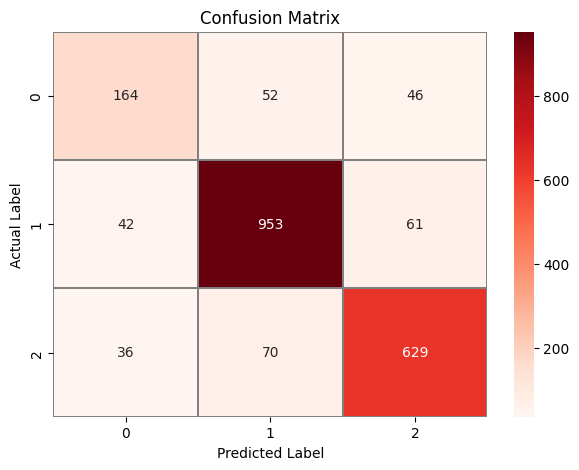

In [274]:
y_pred_21 = model_2021.predict(pad_test_2021)
y_pred_21 = np.argmax(y_pred_21, axis=1)
y_class_21 = np.argmax(y_test_2021, axis=1)
confusion_mtx_21 = confusion_matrix(y_class_21, y_pred_21) 

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx_21, annot = True, linewidths = 0.01, cmap="Reds", linecolor = "gray", fmt = '.0f', ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [165]:
report_21 = classification_report(y_class_21, y_pred_21)
print(report_21)

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       262
           1       0.89      0.90      0.89      1056
           2       0.85      0.86      0.86       735

    accuracy                           0.85      2053
   macro avg       0.81      0.79      0.80      2053
weighted avg       0.85      0.85      0.85      2053



#**Tahun 2022**

##**Load Dataset**

In [166]:
df_2022 = pd.read_csv('/content/2022.csv')
df_2022.head()

,Unnamed: 0,ID,Date,Tweet
0,0,1490804465112596481,2022-02-07 21:47:36+00:00,Kira-kira mereka yg balik dr luar negeri seusa...
1,1,1490731930845085697,2022-02-07 16:59:23+00:00,@nanaajaeman @nightcadance @collegemenfess Hal...
2,2,1490730103361646592,2022-02-07 16:52:07+00:00,gue pengen bgt ikut program exchange nya kampu...
3,3,1490727649651867648,2022-02-07 16:42:22+00:00,@schfess uin jg ptn nder. minusnya uin dibandi...
4,4,1490727276253966339,2022-02-07 16:40:53+00:00,@schfess Oke gua jelasin \n1. Kuota bantuan ke...


In [167]:
# Cek dimensi data
df_2022.shape

(15739, 4)

In [168]:
# Cek missing value
df_2022.isna().sum()

Unnamed: 0    0
ID            0
Date          0
Tweet         0
dtype: int64

In [169]:
# Buat salinan dataset
df_2022_copy = df_2022.copy()

##**Preprocessing Data**

###**Data Cleaning**

In [173]:
df_2022['Tweet'] = df_2022['Tweet'].apply(clean)
df_2022['Tweet'].head()

0    Kira kira mereka yg balik dr luar negeri seusa...
1    Hallo dari aku jurusan tekkim wkwk aku ga ikut...
2    gue pengen bgt ikut program exchange nya kampu...
3    uin jg ptn nder minusnya uin dibanding ptn lai...
4    Oke gua jelasin Kuota bantuan kemenag dan keme...
Name: Tweet, dtype: object

###**Case Folding**

In [175]:
df_2022['Tweet'] = df_2022['Tweet'].apply(case_folding)
df_2022['Tweet'].head()

0    kira kira mereka yg balik dr luar negeri seusa...
1    hallo dari aku jurusan tekkim wkwk aku ga ikut...
2    gue pengen bgt ikut program exchange nya kampu...
3    uin jg ptn nder minusnya uin dibanding ptn lai...
4    oke gua jelasin kuota bantuan kemenag dan keme...
Name: Tweet, dtype: object

###**Slangword Normalization**

In [177]:
df_2022['Tweet'] = df_2022['Tweet'].apply(Slangwords)
df_2022['Tweet'].head()

0    kira kira mereka yang balik dari luar negeri s...
1    halo dari aku jurusan tekkim wkwk aku enggak i...
2    gue pengin banget ikut program exchange nya ka...
3    uin juenggak ptn nder minusnya uin dibanding p...
4    oke gua jelasin kuota bantuan kemenag dan keme...
Name: Tweet, dtype: object

###**Filtering/Stopword Removal**

In [178]:
df_2022['Tweet'] = df_2022['Tweet'].apply(stopword)
df_2022['Tweet'].head()

0    negeri program kampus merdeka iisma pakai kara...
1    halo jurusan tekkim wkwk orenggaknisasi progra...
2    gue pengin banget program exchange nya kampus ...
3    uin juenggak ptn nder minusnya uin dibanding p...
4    oke gua jelasin kuota bantuan kemenag kemendik...
Name: Tweet, dtype: object

###**Labeling**

In [179]:
# Menghapus kolom yang tidak diperlukan
df_2022_clean = df_2022.drop(columns=['Unnamed: 0', 'ID', 'Date'])
df_2022_clean.head()

,Tweet
0,negeri program kampus merdeka iisma pakai kara...
1,halo jurusan tekkim wkwk orenggaknisasi progra...
2,gue pengin banget program exchange nya kampus ...
3,uin juenggak ptn nder minusnya uin dibanding p...
4,oke gua jelasin kuota bantuan kemenag kemendik...


In [182]:
translator_2022 = Translator()
translation_2022 = {}
for column in df_2022_clean.columns:
  unique_elements = df_2022_clean[column].unique()
  for element in unique_elements:
    translation_2022[element] = translator_2022.translate(element).text

In [183]:
df_2022_clean.replace(translation_2022, inplace=True)
df_2022_clean.head()

,Tweet
0,The country program for the independent campus...
1,"hello, the engineering department wkwk oregakn..."
2,I really want the exchange program to be an in...
3,uin is also not ptn nder minus uin compared to...
4,"OK, I'll explain that the quota for assistance..."


In [187]:
df_2022_clean['Tweet'] = df_2022_clean['Tweet'].apply(clean)
df_2022_clean['Tweet'] = df_2022_clean['Tweet'].apply(case_folding)
df_2022_clean['Tweet'].head()

0    the country program for the independent campus...
1    hello the engineering department wkwk oregakni...
2    i really want the exchange program to be an in...
3    uin is also not ptn nder minus uin compared to...
4    ok i ll explain that the quota for assistance ...
Name: Tweet, dtype: object

In [189]:
status_22 = []
polarity_score_22 = []
total_positif_22 = total_negatif_22 = total_netral_22 = total_22 = 0

for tweet in df_2022_clean['Tweet']:
  analysis = TextBlob(tweet)
  all_polarity_22 = analysis.polarity
  polarity_score_22.append(all_polarity_22)
  if (analysis.sentiment.polarity > 0.0):
    total_positif_22 += 1
    status_22.append('Positif')
  elif (analysis.sentiment.polarity < 0.0):
    total_negatif_22 += 1
    status_22.append('Negatif')
  else:
    total_netral_22 += 1
    status_22.append('Netral')
  total_22 += 1

print('Label positif =', total_positif_22)
print('Label negatif =', total_negatif_22)
print('Label netral =', total_netral_22)

Label positif = 5744
Label negatif = 1920
Label netral = 8075


In [190]:
status_22 = pd.DataFrame({'label': status_22})
df_2022_clean['label'] = status_22
df_2022_clean['polarity_score'] = polarity_score_22
df_2022_clean.head()

,Tweet,label,polarity_score
0,the country program for the independent campus...,Netral,0.000000
1,hello the engineering department wkwk oregakni...,Netral,0.000000
2,i really want the exchange program to be an in...,Positif,0.066667
3,uin is also not ptn nder minus uin compared to...,Negatif,-0.050000
4,ok i ll explain that the quota for assistance ...,Positif,0.097500


<Axes: >

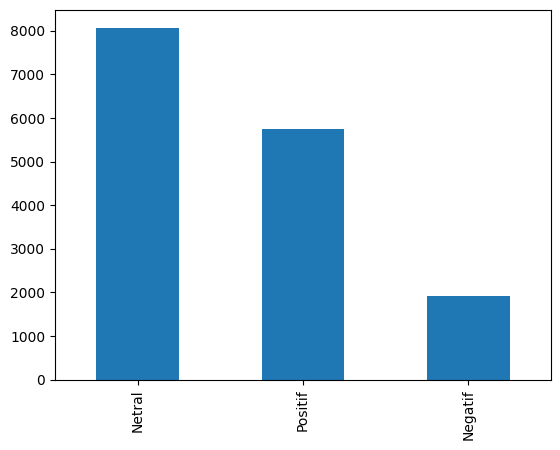

In [191]:
df_2022_clean['label'].value_counts().plot(kind='bar')

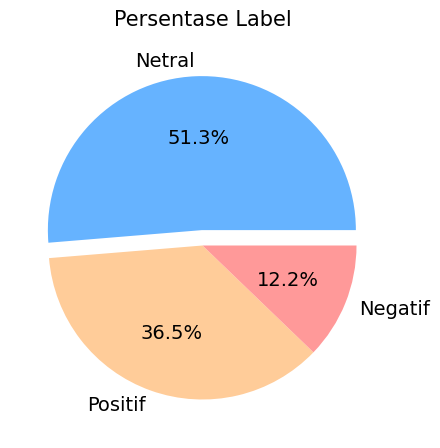

In [193]:
# Visualisasi persentase label
fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df_2022_clean['label'].value_counts()]
labels = ["Netral", "Positif", "Negatif"]
explode = (0.1, 0, 0)
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x=sizes, 
       labels=labels, 
       colors=colors, 
       autopct='%1.1f%%', 
       explode=explode, 
       textprops={'fontsize': 14})
ax.set_title('Persentase Label', fontsize = 15, pad = 20)
plt.show()

###**Word Cloud**

In [194]:
# Buat salinan dataset
df_2022_split = df_2022_clean.copy()

In [195]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [196]:
df_2022_split['Tweet_split'] = df_2022_split['Tweet'].apply(split_word)
df_2022_split['Tweet_split'].head()

0    [the, country, program, for, the, independent,...
1    [hello, the, engineering, department, wkwk, or...
2    [i, really, want, the, exchange, program, to, ...
3    [uin, is, also, not, ptn, nder, minus, uin, co...
4    [ok, i, ll, explain, that, the, quota, for, as...
Name: Tweet_split, dtype: object

In [197]:
positive_review = df_2022_split[df_2022_split['label'] == 'Positif']
positive_review = positive_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_review.index += 1
positive_review.head()

,Tweet_split,polarity_score,label
1,"[i, believe, paragon, group, uses, the, procee...",1.0,Positif
2,"[manifesting, pass, msib, internship, merdeka,...",1.0,Positif
3,"[best, friend, saturday, coordinating, ministe...",1.0,Positif
4,"[pray, for, semeru, the, best, prayers, of, th...",1.0,Positif
5,"[the, best, verse, read, iqra, bismi, rabbikal...",1.0,Positif


In [198]:
negative_review = df_2022_split[df_2022_split['label'] == 'Negatif']
negative_review = negative_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
negative_review.index += 1
negative_review.head()

,Tweet_split,polarity_score,label
1,"[the, output, of, workers, entering, the, worl...",-1.586033e-17,Negatif
2,"[lecturer, of, communication, science, recipie...",-5.551115e-17,Negatif
3,"[june, busy, hectic, panic, uas, report, anwil...",-2.380952e-03,Negatif
4,"[ssa, oh, sis, i, just, read, the, independent...",-2.857143e-03,Negatif
5,"[this, semester, and, next, semester, study, i...",-4.166667e-03,Negatif


In [199]:
neutral_review = df_2022_split[df_2022_split['label'] == 'Netral']
neutral_review = neutral_review[['Tweet_split', 'polarity_score', 'label']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
neutral_review.index += 1
neutral_review.head()

,Tweet_split,polarity_score,label
1,"[the, country, program, for, the, independent,...",0.0,Netral
2,"[hats, off, devina, checylia, setiawan, biotec...",0.0,Netral
3,"[birthday, greetings, isbi, bandung, wilwatikt...",0.0,Netral
4,"[birthday, greetings, isbi, bandung, isbi, lan...",0.0,Netral
5,"[birthday, greetings, isbi, bandung, rector, o...",0.0,Netral


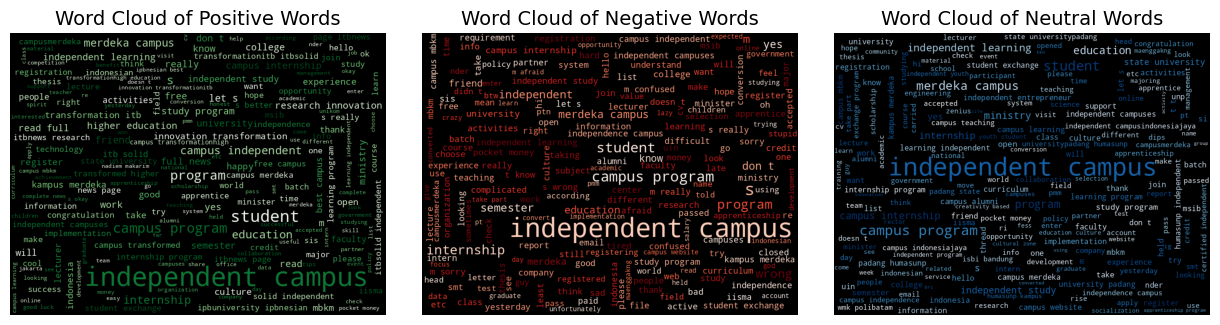

In [200]:
# Positif
positive_words = positive_review['Tweet_split']

fig, ax = plt.subplots(1, 3,figsize = (12, 10))

list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

# Negatif
negative_words = negative_review['Tweet_split']

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

# Netral
neutral_words = neutral_review['Tweet_split']

list_words_neutral=''
for row_word in neutral_words:
    for word in row_word:
        list_words_neutral += ' '+(word)
wordcloud_neutral = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Blues'
                               , min_font_size = 10).generate(list_words_neutral)
ax[2].set_title('Word Cloud of Neutral Words', fontsize = 14)
ax[2].grid(False)
ax[2].imshow((wordcloud_neutral))
fig.tight_layout(pad=0)
ax[2].axis('off')

plt.show()

###**One-Hot-Encoding**

In [201]:
# Melakukan encoding terhadap label
# Melakukan one-hot-encoding terhadap label
category_2022 = pd.get_dummies(df_2022_clean.label)
df_2022_clean = pd.concat([df_2022_clean, category_2022], axis=1)
df_2022_clean = df_2022_clean.drop(columns=['label'])
df_2022_clean.head()

,Tweet,polarity_score,Negatif,Netral,Positif
0,the country program for the independent campus...,0.000000,0,1,0
1,hello the engineering department wkwk oregakni...,0.000000,0,1,0
2,i really want the exchange program to be an in...,0.066667,0,0,1
3,uin is also not ptn nder minus uin compared to...,-0.050000,1,0,0
4,ok i ll explain that the quota for assistance ...,0.097500,0,0,1


###**Split Data**

In [202]:
X_2022 = df_2022_clean['Tweet'].values
y_2022 = df_2022_clean[['Negatif', 'Netral',	'Positif']].values
X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(X_2022, y_2022, test_size=0.3)

###**Tokenization**

In [203]:
tokenizer_2022 = Tokenizer(num_words=10000, oov_token='x')
tokenizer_2022.fit_on_texts(X_train_2022) 
tokenizer_2022.fit_on_texts(X_test_2022)
 
seq_train_2022 = tokenizer_2022.texts_to_sequences(X_train_2022)
seq_test_2022 = tokenizer_2022.texts_to_sequences(X_test_2022)
 
pad_train_2022 = pad_sequences(seq_train_2022) 
pad_test_2022 = pad_sequences(seq_test_2022)

###**Fungsi Callback**

In [204]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and 
       logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai > 85%!")
      self.model.stop_training = True
callbacks = myCallback()

##**Modeling LSTM**

In [209]:
model_2022 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=64),
    tf.keras.layers.LSTM(64),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

print(model_2022.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          1280000   
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,321,539
Trainable params: 1,321,539
Non-trainable params: 0
_________________________________________________________________
None


In [210]:
model_2022.compile(loss='categorical_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

In [211]:
history_2022 = model_2022.fit(pad_train_2022, 
                              y_train_2022, 
                              epochs=100, 
                              validation_data=(pad_test_2022, y_test_2022), 
                              verbose=2,
                              callbacks=[callbacks])

Epoch 1/100
345/345 - 27s - loss: 0.7416 - accuracy: 0.6813 - val_loss: 0.5419 - val_accuracy: 0.7933 - 27s/epoch - 78ms/step
Epoch 2/100

Akurasi telah mencapai > 85%!
345/345 - 22s - loss: 0.3709 - accuracy: 0.8669 - val_loss: 0.4022 - val_accuracy: 0.8767 - 22s/epoch - 63ms/step


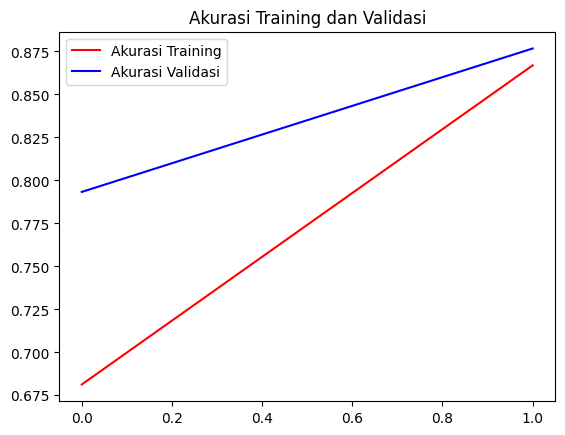

<Figure size 640x480 with 0 Axes>

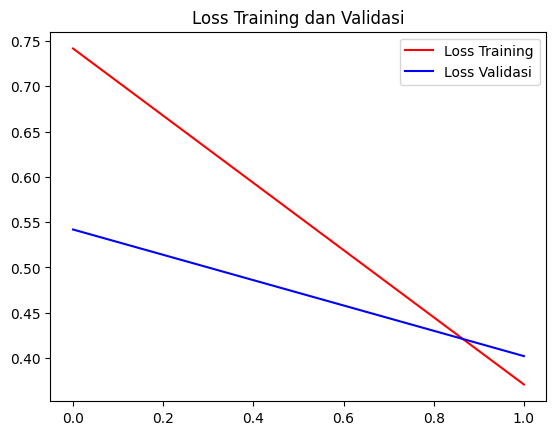

<Figure size 640x480 with 0 Axes>

In [212]:
acc = history_2022.history['accuracy'] 
val_acc = history_2022.history['val_accuracy']      
loss = history_2022.history['loss']             
val_loss = history_2022.history['val_loss']    

epochs = range(len(acc))                                 

plt.plot(epochs, acc, 'r', label = 'Akurasi Training')             
plt.plot(epochs, val_acc, 'b', label = 'Akurasi Validasi')    
plt.title('Akurasi Training dan Validasi')                    
plt.legend(loc = 0)                                         
plt.figure()                                             
plt.show()                                                  

plt.plot(epochs, loss, 'r', label = 'Loss Training')           
plt.plot(epochs, val_loss, 'b', label = 'Loss Validasi')        
plt.title('Loss Training dan Validasi')                      
plt.legend(loc = 0)           
plt.figure()                 
plt.show()          

###**Confusion Matrix**

148/148 [==============================] - 5s 28ms/step


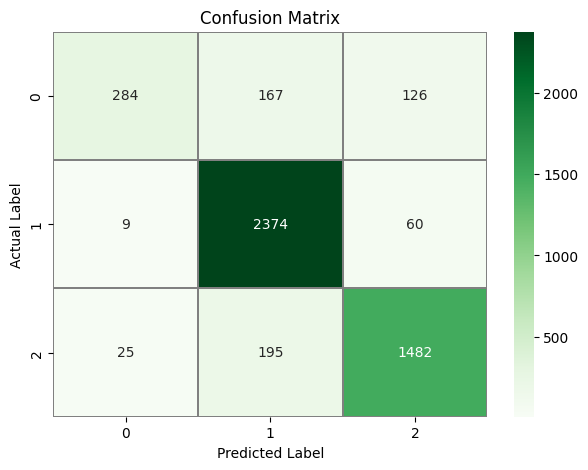

In [213]:
y_pred_22 = model_2022.predict(pad_test_2022)
y_pred_22 = np.argmax(y_pred_22, axis=1)
y_class_22 = np.argmax(y_test_2022, axis=1)
confusion_mtx_22 = confusion_matrix(y_class_22, y_pred_22) 

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx_22, annot = True, linewidths = 0.01, cmap="Greens", linecolor = "gray", fmt = '.0f', ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [214]:
report_22 = classification_report(y_class_22, y_pred_22)
print(report_22)

              precision    recall  f1-score   support

           0       0.89      0.49      0.63       577
           1       0.87      0.97      0.92      2443
           2       0.89      0.87      0.88      1702

    accuracy                           0.88      4722
   macro avg       0.88      0.78      0.81      4722
weighted avg       0.88      0.88      0.87      4722

